# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Nick Elias

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

## Importing dependencies

In [67]:
import requests
import matplotlib.pyplot as plt
import re
import spacy
from bs4 import BeautifulSoup
from html import unescape
from spacytextblob.spacytextblob import SpacyTextBlob
from collections import Counter
import numpy as np

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

# Add SpacyTextBlob to the pipeline
nlp.add_pipe('spacytextblob')

##  Question 1

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [68]:
# Extract html from coffee review article website
def save_article_html(url, filename):
    # Send the HTTP request to the URL
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'}
    response = requests.get(url, headers=headers)

    # Check if request was successful
    if response.status_code == 200:
        # Get the HTML content of the page
        html_content = response.text

        # Save the HTML content to a file
        with open(filename, 'w', encoding='utf-8') as f:
            f.write(html_content)
        
        print(f"HTML content saved to {filename}")
    else:
        print("Failed to retrieve the page.")

# Example: Save HTML content of a coffee maker review article
url = 'https://www.nytimes.com/wirecutter/reviews/best-espresso-machine-grinder-and-accessories-for-beginners/'  # Replace with the actual review article URL
save_article_html(url, 'coffee_maker_review.html')


HTML content saved to coffee_maker_review.html


# Question 2

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [69]:
def extract_clean_text_and_analyze_sentiment(html_file):
    # Read the HTML file
    with open(html_file, 'r', encoding='utf-8') as file:
        html_content = file.read()

    # Parse the HTML
    soup = BeautifulSoup(html_content, 'html.parser')

    # Remove <script> and <style> elements
    for script_or_style in soup(['script', 'style']):
        script_or_style.decompose()

    # Optionally remove nav and footer sections
    for nav_or_footer in soup.find_all(['nav', 'footer']):
        nav_or_footer.decompose()

    # Extract main article content (if applicable)
    main_content = soup.find('article') or soup.find('div', class_='main-content')
    if main_content:
        article_text = main_content.get_text(separator="\n", strip=True)
    else:
        article_text = soup.get_text(separator="\n", strip=True)

    # Clean up whitespace and HTML entities
    article_text = re.sub(r'\s+', ' ', article_text)  # Normalize spaces
    article_text = unescape(article_text)  # Decode HTML entities

    # Remove specific unwanted phrases like "Advertisement SKIP ADVERTISEMENT"
    article_text = re.sub(r'\bAdvertisement\s*SKIP\s*ADVERTISEMENT\b', '', article_text, flags=re.IGNORECASE)

    # Process the cleaned text with spaCy
    doc = nlp(article_text)

    # Get the polarity score (sentiment analysis) from SpacyTextBlob
    polarity = doc._.blob.polarity  # SpacyTextBlob stores polarity in the ._.polarity attribute

    # Count the number of sentences in the article
    num_sentences = len(list(doc.sents))

    # Print the results
    print(f"Sentiment Polarity: {polarity:.2f} (Positive if >0, Negative if <0, Neutral if =0)")
    print(f"Number of Sentences in the article: {num_sentences}")

    # Optionally, save the cleaned text to a .txt file
    output_file = 'cleaned_coffee_maker_review.txt'  # Desired file name
    with open(output_file, 'w', encoding='utf-8') as file:
        file.write(article_text)

    print(f"Cleaned text has been saved to {output_file}")

    # Save the cleaned HTML back to a new HTML file
    cleaned_html_file = 'cleaned_coffee_maker_review.html'  # Desired HTML file name
    with open(cleaned_html_file, 'w', encoding='utf-8') as file:
        file.write(str(soup))  # Write the cleaned soup (HTML) to file
    print(f"Cleaned HTML has been saved to {cleaned_html_file}")

# Example: Analyze sentiment and sentences for the saved article HTML
html_file = 'coffee_maker_review.html'  # Replace with your saved HTML file path
extract_clean_text_and_analyze_sentiment(html_file)

Sentiment Polarity: 0.21 (Positive if >0, Negative if <0, Neutral if =0)
Number of Sentences in the article: 408
Cleaned text has been saved to cleaned_coffee_maker_review.txt
Cleaned HTML has been saved to cleaned_coffee_maker_review.html


# Question 3

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [70]:
def analyze_frequent_tokens(html_file):
    # Read the HTML file and extract text
    with open(html_file, 'r', encoding='utf-8') as file:
        html_content = file.read()
    
    # Parse HTML and get the text
    soup = BeautifulSoup(html_content, 'html.parser')
    article_text = soup.get_text(separator="\n", strip=True)

    # Process the text with spaCy
    doc = nlp(article_text)

    # Create a list of tokens (converted to lowercase) and filter out stop words, punctuation, and spaces
    tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]

    # Use Counter to count the frequency of each token
    token_frequencies = Counter(tokens)

    # Get the 5 most common tokens
    most_common_tokens = token_frequencies.most_common(5)

    # Print the results
    print("Top 5 Most Frequent Tokens:")
    for token, freq in most_common_tokens:
        print(f"{token}: {freq}")

    print("\nToken Frequencies:")
    for token, freq in token_frequencies.items():
        print(f"{token}: {freq}")

# Example: Analyze frequent tokens for the saved article HTML
html_file = 'cleaned_coffee_maker_review.html'  # Replace with your saved HTML file path
analyze_frequent_tokens(html_file)


Top 5 Most Frequent Tokens:
espresso: 106
machine: 94
breville: 55
shots: 54
barista: 48

Token Frequencies:
4: 1
best: 19
home: 17
espresso: 106
machines: 43
2024: 5
|: 1
reviews: 2
wirecutter: 31
advertisement: 18
skip: 10
content: 1
help: 8
decide: 1
research: 2
log: 1
account: 1
independently: 1
review: 3
recommend: 11
buy: 9
links: 1
earn: 1
commission: 1
learn: 6
deal: 7
breville: 55
barista: 48
touch: 45
machine: 94
$: 40
693: 5
27: 2
kitchen: 7
coffee: 48
updated: 3
november: 2
25: 1
save: 5
connie: 19
park: 19
nyt: 23
justin: 3
vassallo: 2
ciara: 4
murray: 4
jordan: 4
fyi: 1
new: 8
round: 3
testing: 10
profitec: 26
pick: 26
oracle: 29
jet: 29
upgrade: 9
gaggia: 25
classic: 21
evo: 11
pro: 21
making: 21
café: 11
quality: 13
drinks: 14
longer: 5
reserved: 1
hobbyists: 2
baristas: 5
easier: 2
beginner: 3
started: 1
little: 14
practice: 8
lattes: 5
cortados: 3
rival: 1
upscale: 1
changing: 2
pajamas: 1
dozens: 3
think: 10
option: 6
skilled: 3
enthusiasts: 1
alike: 2
powerful: 14
e

# Question 4

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [71]:
def analyze_frequent_lemmas(html_file):
    # Read the HTML file and extract text
    with open(html_file, 'r', encoding='utf-8') as file:
        html_content = file.read()
    
    # Parse HTML and get the text
    soup = BeautifulSoup(html_content, 'html.parser')
    article_text = soup.get_text(separator="\n", strip=True)

    # Process the text with spaCy
    doc = nlp(article_text)

    # Create a list of lemmatized tokens (converted to lowercase) and filter out stop words and punctuation
    lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]

    # Use Counter to count the frequency of each lemma
    lemma_frequencies = Counter(lemmas)

    # Get the 5 most common lemmas
    most_common_lemmas = lemma_frequencies.most_common(5)

    # Print the results
    print("Top 5 Most Frequent Lemmas:")
    for lemma, freq in most_common_lemmas:
        print(f"{lemma}: {freq}")

    print("\nLemma Frequencies:")
    for lemma, freq in lemma_frequencies.items():
        print(f"{lemma}: {freq}")

# Example: Analyze frequent lemmas for the saved article HTML
html_file = 'cleaned_coffee_maker_review.html'  # Replace with your saved HTML file path
analyze_frequent_lemmas(html_file)

Top 5 Most Frequent Lemmas:
machine: 136
espresso: 107
shot: 98
breville: 55
barista: 53

Lemma Frequencies:
4: 1
best: 7
home: 17
espresso: 107
machines: 1
2024: 5
|: 1
reviews: 1
wirecutter: 31
advertisement: 18
skip: 10
content: 1
help: 11
decide: 1
research: 2
log: 1
account: 1
independently: 1
review: 4
recommend: 13
buy: 11
link: 1
earn: 1
commission: 1
learn: 8
deal: 7
breville: 55
barista: 53
touch: 46
machine: 136
$: 40
693: 5
27: 2
kitchen: 7
coffee: 49
update: 3
november: 2
25: 1
save: 6
connie: 19
park: 19
nyt: 23
justin: 3
vassallo: 2
ciara: 4
murray: 4
jordan: 4
fyi: 1
new: 8
round: 3
testing: 7
profitec: 26
pick: 43
oracle: 29
jet: 29
upgrade: 9
gaggia: 25
classic: 21
evo: 11
pro: 24
make: 27
café: 11
quality: 13
drink: 23
long: 9
reserve: 1
hobbyist: 2
easy: 13
beginner: 15
start: 9
little: 14
practice: 8
latte: 11
cortado: 3
rival: 1
upscale: 1
change: 5
pajama: 1
test: 16
dozen: 3
think: 10
good: 26
option: 10
skilled: 3
enthusiast: 1
alike: 2
powerful: 14
use: 22
cap

# Question 5

5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

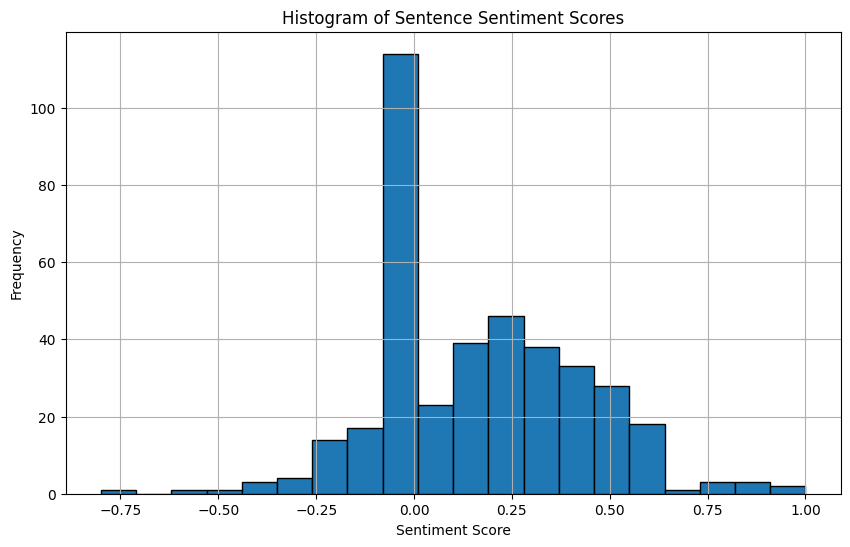

In [72]:
def analyze_sentiment_per_sentence_tokens(html_file):
    # Read the HTML file and extract text
    with open(html_file, 'r', encoding='utf-8') as file:
        html_content = file.read()
    
    # Parse HTML and get the text
    soup = BeautifulSoup(html_content, 'html.parser')
    article_text = soup.get_text(separator="\n", strip=True)

    # Process the text with spaCy
    doc = nlp(article_text)

    # List to store sentiment scores of sentences
    sentence_scores_tokens = []

    # Loop over sentences
    for sent in doc.sents:
        # Get the sentiment polarity score for the sentence
        polarity = sent._.blob.sentiment.polarity
        
        # Add the score to the list of sentence scores
        sentence_scores_tokens.append(polarity)

    # Plot histogram of sentiment scores
    plt.figure(figsize=(10, 6))
    plt.hist(sentence_scores_tokens, bins=20, edgecolor='black')
    plt.title("Histogram of Sentence Sentiment Scores")
    plt.xlabel("Sentiment Score")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

    # Return the sentence scores
    return sentence_scores_tokens

# Example: Analyze sentiment scores for the saved article HTML
html_file = 'cleaned_coffee_maker_review.html'  # *******Replace with your saved HTML file path*******
sentence_scores_tokens = analyze_sentiment_per_sentence_tokens(html_file)


# Most common range of sentence sentiment scores using tokens seems to be between -0.25 and +0.50

# Question 6

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

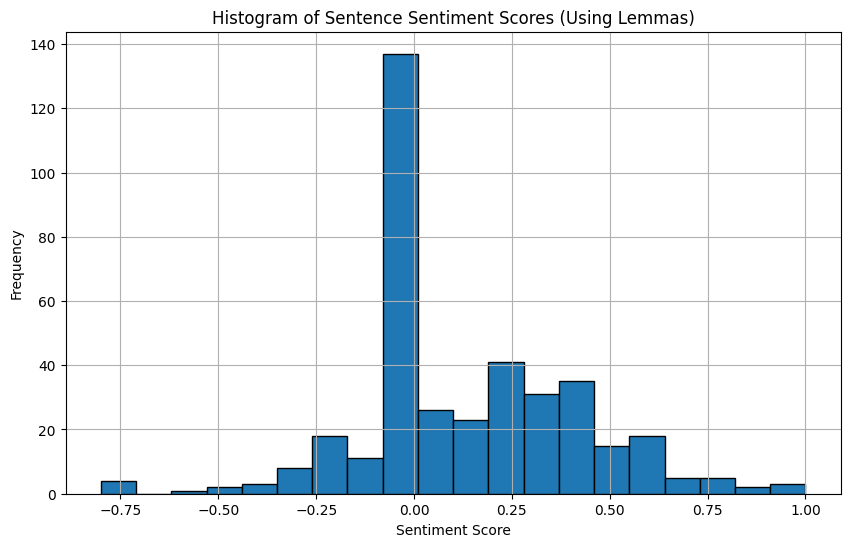

In [73]:
def analyze_sentiment_per_sentence_lemmas(html_file):
    # Read the HTML file and extract text
    with open(html_file, 'r', encoding='utf-8') as file:
        html_content = file.read()
    
    # Parse HTML and get the text
    soup = BeautifulSoup(html_content, 'html.parser')
    article_text = soup.get_text(separator="\n", strip=True)

    # Process the text with spaCy
    doc = nlp(article_text)

    # List to store sentiment scores of sentences using lemmas
    sentence_scores_lemmas = []

    # Loop over sentences
    for sent in doc.sents:
        # Extract lemmas of the sentence
        lemmas = [token.lemma_ for token in sent if not token.is_stop and not token.is_punct]
        
        if lemmas:
            # Join lemmas into a sentence-like string
            lemmatized_text = ' '.join(lemmas)
            
            # Process lemmatized text with spaCyTextBlob for sentiment
            lemmatized_doc = nlp(lemmatized_text)
            sentiment = lemmatized_doc._.blob.sentiment.polarity
            sentence_scores_lemmas.append(sentiment)

    # Plot histogram of sentiment scores based on lemmas
    plt.figure(figsize=(10, 6))
    plt.hist(sentence_scores_lemmas, bins=20, edgecolor='black')
    plt.title("Histogram of Sentence Sentiment Scores (Using Lemmas)")
    plt.xlabel("Sentiment Score")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

    # Return the sentence scores
    return sentence_scores_lemmas


# Example: Analyze sentiment scores for the saved article HTML
html_file = 'cleaned_coffee_maker_review.html'  # *******Replace with your saved HTML file path*******
sentence_scores_lemmas = analyze_sentiment_per_sentence_lemmas(html_file)


# Most common range of sentence sentiment scores using lemmas seems to be between -0.25 and +0.50, with higher frequency near 0 than tokens.

# Question 7

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 0.125
* Cutoff Score (lemmas): 0.050

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

In [74]:
def find_cutoff(scores):
    # Sort the scores in ascending order
    sorted_scores = sorted(scores)
    # Find the cutoff score (median)
    cutoff_index = len(sorted_scores) // 2  # Median index
    cutoff_score = sorted_scores[cutoff_index]
    return cutoff_score

cutoff_tokens = find_cutoff(sentence_scores_tokens)  # Full token scores (e.g., 389)
cutoff_lemmas = find_cutoff(sentence_scores_lemmas)  # Full lemma scores (e.g., 388)

print(f"Cutoff Score (tokens): {cutoff_tokens}")
print(f"Cutoff Score (lemmas): {cutoff_lemmas}")

Cutoff Score (tokens): 0.125
Cutoff Score (lemmas): 0.04999999999999999


# Question 8

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [75]:
def create_summary_with_token_cutoff(html_file, cutoff_tokens, max_sentences=10):
    # Read and parse the HTML
    with open(html_file, 'r', encoding='utf-8') as file:
        html_content = file.read()
    soup = BeautifulSoup(html_content, 'html.parser')
    article_text = soup.get_text(separator="\n", strip=True)
    
    # Process text with spaCy
    doc = nlp(article_text)
    
    # Filter sentences
    filtered_sentences = []
    for sent in doc.sents:
        sentiment = sent._.blob.sentiment.polarity
        
        # Basic filters for irrelevant sentences
        if (
            len(sent.text.split()) > 10  # Longer than 10 words
            and len(sent.text.split()) < 50  # Shorter than 50 words
            and "advertisement" not in sent.text.lower()  # No "Advertisement"
            and "buying options" not in sent.text.lower()  # No "Buying Options"
            and sentiment > cutoff_tokens  # Sentiment cutoff
        ):
            filtered_sentences.append(sent.text.strip())
    
    # Deduplicate sentences
    unique_sentences = list(dict.fromkeys(filtered_sentences))
    
    # Limit the number of sentences to max_sentences
    summary_sentences = unique_sentences[:max_sentences]
    
    # Join into a summary
    summary = " ".join(summary_sentences)
    
    print(f"Summary ({len(summary_sentences)} sentences):")
    print(summary)
    return summary


# Generate a summary using token-based cutoff
html_file = 'cleaned_coffee_maker_review.html'
summary = create_summary_with_token_cutoff(html_file, cutoff_tokens)

Summary (10 sentences):
We still recommend the
Gaggia Classic Evo Pro
and the
Breville Barista Touch
. New home espresso machines have made it easier than ever for a beginner to get started. After testing dozens of machines, we think the
Profitec Go
is the best option for new and skilled enthusiasts alike. It’s powerful and easy to use, and it’s capable of yielding consistent, rich shots with robust flavor profiles. Everything we recommend
Top pick
Profitec GO Espresso Machine
The best espresso machine
The Profitec Go can pull deep, flavorful, and consistent shots, combining the capability of higher-priced machines with a basic interface. It pulls shots with a full range of flavor and depth, and it can be dialed in to highlight particular characteristics of your beans. It’s straightforward, with a basic (though attractive) design, a comfortable portafilter that locks into the group head easily, and a steam wand that can be angled to a wide range of heights and directions. The steam wan

# Question 9

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [76]:
def create_summary_with_token_cutoff_and_analysis(html_file, cutoff_tokens, max_sentences=10):
    # Read and parse the HTML
    with open(html_file, 'r', encoding='utf-8') as file:
        html_content = file.read()
    soup = BeautifulSoup(html_content, 'html.parser')
    article_text = soup.get_text(separator="\n", strip=True)
    
    # Process text with spaCy
    doc = nlp(article_text)
    
    # Filter sentences
    filtered_sentences = []
    for sent in doc.sents:
        sentiment = sent._.blob.sentiment.polarity
        
        # Basic filters for irrelevant sentences
        if (
            len(sent.text.split()) > 10  # Longer than 10 words
            and len(sent.text.split()) < 50  # Shorter than 50 words
            and "advertisement" not in sent.text.lower()  # No "Advertisement"
            and "buying options" not in sent.text.lower()  # No "Buying Options"
            and sentiment > cutoff_tokens  # Sentiment cutoff
        ):
            filtered_sentences.append(sent.text.strip())
    
    # Deduplicate sentences
    unique_sentences = list(dict.fromkeys(filtered_sentences))
    
    # Limit the number of sentences to max_sentences
    summary_sentences = unique_sentences[:max_sentences]
    
    # Join into a summary
    summary = " ".join(summary_sentences)
    
    # Calculate sentiment polarity score of the summary
    summary_doc = nlp(summary)
    summary_polarity = summary_doc._.blob.sentiment.polarity
       
    # Print analysis
    print("Analysis of Token Summary")
    print(f"Polarity Score of Summary: {summary_polarity:.3f}")
    print(f"Number of Sentences in Summary: {len(summary_sentences)}")
    
    return summary

# Generate a summary and analyze it
html_file = 'cleaned_coffee_maker_review.html'
summary = create_summary_with_token_cutoff_and_analysis(html_file, cutoff_tokens)

Analysis of Token Summary
Polarity Score of Summary: 0.351
Number of Sentences in Summary: 10


# Question 10:

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [77]:
def calculate_lemma_sentiment(sentence):
    """
    Calculate sentiment polarity for a sentence based on its lemmas using SpacyTextBlob.
    Exclude stop words and punctuation.
    """
    # Extract lemmas from tokens in the sentence, excluding stop words and punctuation
    lemmas = [token.lemma_ for token in sentence if not token.is_stop and not token.is_punct]
    lemma_text = ' '.join(lemmas)  # Join lemmas into a single text
    
    # Process the lemma text with spaCy to compute sentiment
    lemma_doc = nlp(lemma_text)  # Create a new Doc for the lemmatized text
    
    # Get sentiment polarity using SpacyTextBlob
    lemma_sentiment = lemma_doc._.blob.sentiment.polarity
    return lemma_sentiment


def create_summary_with_lemma_cutoff(html_file, cutoff_lemmas, max_sentences=10):
    """
    Create a summary of the article using lemma-based sentiment scores.
    Add sentences with a lemma sentiment score greater than the cutoff to the summary.
    """
    # Read and parse the HTML
    with open(html_file, 'r', encoding='utf-8') as file:
        html_content = file.read()
    soup = BeautifulSoup(html_content, 'html.parser')
    article_text = soup.get_text(separator="\n", strip=True)
    
    # Process text with spaCy
    doc = nlp(article_text)
    
    # Initialize an empty list for the summary sentences
    sentence_list = []
    
    # Loop through sentences in the document
    for sent in doc.sents:
        # Calculate lemma-based sentiment for the sentence
        lemma_sentiment = calculate_lemma_sentiment(sent)
        
        # Basic filters for irrelevant sentences 
        if (
            len(sent.text.split()) > 10  # Longer than 10 words
            and len(sent.text.split()) < 50  # Shorter than 50 words
            and "advertisement" not in sent.text.lower()  # No "Advertisement"
            and "buying options" not in sent.text.lower()  # No "Buying Options"
            and lemma_sentiment > cutoff_lemmas  # Lemma-based sentiment cutoff
        ):
            # Add the sentence to the summary if it meets the criteria
            sentence_list.append(sent.text.strip())
        
        # Stop if we have enough sentences
        if len(sentence_list) >= max_sentences:
            break
    
    # Generate the summary text by joining the sentences with a space
    summary = ' '.join(sentence_list)
    
    # Print the summary and return it
    print(f"Summary ({len(sentence_list)} sentences):")
    print(summary)
    return summary


# Example usage
html_file = 'cleaned_coffee_maker_review.html'  # Your HTML file
create_summary_with_lemma_cutoff(html_file, cutoff_lemmas)

Summary (10 sentences):
We still recommend the
Gaggia Classic Evo Pro
and the
Breville Barista Touch
. New home espresso machines have made it easier than ever for a beginner to get started. After testing dozens of machines, we think the
Profitec Go
is the best option for new and skilled enthusiasts alike. It’s powerful and easy to use, and it’s capable of yielding consistent, rich shots with robust flavor profiles. Everything we recommend
Top pick
Profitec GO Espresso Machine
The best espresso machine
The Profitec Go can pull deep, flavorful, and consistent shots, combining the capability of higher-priced machines with a basic interface. It pulls shots with a full range of flavor and depth, and it can be dialed in to highlight particular characteristics of your beans. It’s straightforward, with a basic (though attractive) design, a comfortable portafilter that locks into the group head easily, and a steam wand that can be angled to a wide range of heights and directions. The steam wan

'We still recommend the\nGaggia Classic Evo Pro\nand the\nBreville Barista Touch\n. New home espresso machines have made it easier than ever for a beginner to get started. After testing dozens of machines, we think the\nProfitec Go\nis the best option for new and skilled enthusiasts alike. It’s powerful and easy to use, and it’s capable of yielding consistent, rich shots with robust flavor profiles. Everything we recommend\nTop pick\nProfitec GO Espresso Machine\nThe best espresso machine\nThe Profitec Go can pull deep, flavorful, and consistent shots, combining the capability of higher-priced machines with a basic interface. It pulls shots with a full range of flavor and depth, and it can be dialed in to highlight particular characteristics of your beans. It’s straightforward, with a basic (though attractive) design, a comfortable portafilter that locks into the group head easily, and a steam wand that can be angled to a wide range of heights and directions. The steam wand isn’t espec

# Question 11:

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [78]:
def create_summary_with_lemma_cutoff_and_analysis(html_file, cutoff_tokens, max_sentences=10):
    # Read and parse the HTML
    with open(html_file, 'r', encoding='utf-8') as file:
        html_content = file.read()
    soup = BeautifulSoup(html_content, 'html.parser')
    article_text = soup.get_text(separator="\n", strip=True)
    
    # Process text with spaCy
    doc = nlp(article_text)
    
    # Filter sentences
    filtered_sentences = []
    for sent in doc.sents:
        sentiment = sent._.blob.sentiment.polarity
        
        # Basic filters for irrelevant sentences
        if (
            len(sent.text.split()) > 10  # Longer than 10 words
            and len(sent.text.split()) < 50  # Shorter than 50 words
            and "advertisement" not in sent.text.lower()  # No "Advertisement"
            and "buying options" not in sent.text.lower()  # No "Buying Options"
            and sentiment > cutoff_tokens  # Sentiment cutoff
        ):
            filtered_sentences.append(sent.text.strip())
    
    # Deduplicate sentences
    unique_sentences = list(dict.fromkeys(filtered_sentences))
    
    # Limit the number of sentences to max_sentences
    summary_sentences = unique_sentences[:max_sentences]
    
    # Join into a summary
    summary = " ".join(summary_sentences)
    
    # Calculate sentiment polarity score of the summary
    summary_doc = nlp(summary)
    summary_polarity = summary_doc._.blob.sentiment.polarity
       
    # Print analysis
    print("Analysis of Lemma Summary")
    print(f"Polarity Score of Summary: {summary_polarity:.3f}")
    print(f"Number of Sentences in Summary: {len(summary_sentences)}")
    
    return summary

# Generate a summary and analyze it
html_file = 'cleaned_coffee_maker_review.html'
summary = create_summary_with_token_cutoff_and_analysis(html_file, cutoff_lemmas)

Analysis of Token Summary
Polarity Score of Summary: 0.351
Number of Sentences in Summary: 10


# Question 12

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

Analysis: of Lemma Summary
Polarity Score of Summary: 0.351
Number of Sentences in Summary: 10

Analysis: of Token Summary
Polarity Score of Summary: 0.351
Number of Sentences in Summary: 10

There is no difference here, potentially because the filtering process applied to the article's html restricted the text to the most useful tokens and lemmas, regardless of differing cutoffs.

# Question 13

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

Even though they are the same summary, I think it does a decent job based on the scraping methodology applied. 3 out of the 4 espresso machines are mentioned in the summary with their specifications and reasons for buying. I'm sure there are different filtering methods that can be applied against the html to hone down the result, and potentially to get differing responses for tokens vs. lemmas.